# Crab Measurements

<img src = '../images/Measurement-of-width-and-length-of-crab-Source-FAO.png' alt = 'https://www.researchgate.net/figure/Measurement-of-width-and-length-of-crab-Source-FAO_fig2_316495313'>


## Data Dictionary

| Column Name      | Data Type   | Description                                                |
|------------------|-------------|------------------------------------------------------------|
| id               | integer     | The identification number of the crab species              |
| Sex              | Categorical | M for Male; F for Female; I for Infant                     |
| Length           | float       | Measured from the front (eye) carapace to the tail         |
| Diameter         | float       | Measured from one side of the carapace to the other        |
| Height           | float       | Measured from the base of the body to the top              |
| Weight           | float       | The overall weight of the crab                             |
| Shucked Weight   | float       | The weight of 'meat'                                       |
| Viscera Weight   | float       | The weight of the internal organs                          |
| Shell Weight     | float       | The weight of the shell                                    |
| Age              | integer     | The target variable and the age of the crab                |


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helpers


# set plot theme
plt.style.use('ggplot')

# set dataframe display 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 10000)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 10000)

In [2]:
# import training data
train_raw = pd.read_csv('../data/train.csv')

print(train_raw.head()) # initial inspect of train df
print(train_raw.dtypes) # check datatypes

   id Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  Shell Weight  Age
0   0   I  1.5250    1.1750  0.3750  28.973189       12.728926        6.647958      8.348928    9
1   1   I  1.1000    0.8250  0.2750  10.418441        4.521745        2.324659      3.401940    8
2   2   M  1.3875    1.1125  0.3750  24.777463       11.339800        5.556502      6.662133    9
3   3   F  1.7000    1.4125  0.5000  50.660556       20.354941       10.991839     14.996885   11
4   4   I  1.2500    1.0125  0.3375  23.289114       11.977664        4.507570      5.953395    8
id                  int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Weight            float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Age                 int64
dtype: object


In [3]:
# import test data
test_raw = pd.read_csv('../data/test.csv')

print(test_raw.head()) # initial inspection of test df
print(test_raw.dtypes) # check datatypes for each variable

      id Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  Shell Weight
0  74051   I  1.0500    0.7625  0.2750   8.618248        3.657085        1.729319      2.721552
1  74052   I  1.1625    0.8875  0.2750  15.507176        7.030676        3.246018      3.968930
2  74053   F  1.2875    0.9875  0.3250  14.571643        5.556502        3.883882      4.819415
3  74054   F  1.5500    0.9875  0.3875  28.377849       13.380964        6.548735      7.030676
4  74055   I  1.1125    0.8500  0.2625  11.765042        5.528153        2.466407      3.331066
id                  int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Weight            float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
dtype: object


In [4]:
# clean both the train and test dataset

train_df = helpers.clean_headers(train_raw)
test_df = helpers.clean_headers(test_raw)

print(train_df.head(2)) # inspect if column headers for train df are cleaned
print()
print(test_df.head(2)) # inspect if column headers for test df are cleaned

  sex  length  diameter  height     weight  shucked_weight  viscera_weight  shell_weight  age
0   I   1.525     1.175   0.375  28.973189       12.728926        6.647958      8.348928    9
1   I   1.100     0.825   0.275  10.418441        4.521745        2.324659      3.401940    8

  sex  length  diameter  height     weight  shucked_weight  viscera_weight  shell_weight
0   I  1.0500    0.7625   0.275   8.618248        3.657085        1.729319      2.721552
1   I  1.1625    0.8875   0.275  15.507176        7.030676        3.246018      3.968930


## Exploratory Data Analysis

We will only focus on the training dataset for EDA.

In [5]:
# basic statistical summary
print(train_df.describe())

             length      diameter        height        weight  shucked_weight  viscera_weight  shell_weight           age
count  74051.000000  74051.000000  74051.000000  74051.000000    74051.000000    74051.000000  74051.000000  74051.000000
mean       1.317460      1.024496      0.348089     23.385217       10.104270        5.058386      6.723870      9.967806
std        0.287757      0.237396      0.092034     12.648153        5.618025        2.792729      3.584372      3.175189
min        0.187500      0.137500      0.000000      0.056699        0.028349        0.042524      0.042524      1.000000
25%        1.150000      0.887500      0.300000     13.437663        5.712424        2.863300      3.968930      8.000000
50%        1.375000      1.075000      0.362500     23.799405        9.908150        4.989512      6.931453     10.000000
75%        1.537500      1.200000      0.412500     32.162508       14.033003        6.988152      9.071840     11.000000
max        2.012815     

It is important to note that the units for measurements are unknown and only age is assumed to be values in years. 

Based on the initial statistical table, we can see that the values for length and diameter do not differ largely from the mean. However, there is a large difference between the average height and weight and the 75%, maximum values for those variables. Those could be possible outliers and will need to be analysed closer. Similarly, The values of weight do vary widely between the average and the higher quantiles. 

We see that the minimum age for the crab is 1 years old, and the oldest sample was found to be 29 years.

In [6]:
# check for null values
print(train_df.isna().sum()) # no null values found

sex               0
length            0
diameter          0
height            0
weight            0
shucked_weight    0
viscera_weight    0
shell_weight      0
age               0
dtype: int64


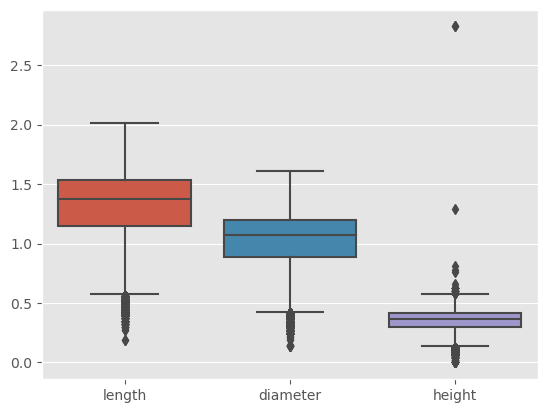

             length      diameter        height        weight  shucked_weight  viscera_weight  shell_weight           age
count  74051.000000  74051.000000  74051.000000  74051.000000    74051.000000    74051.000000  74051.000000  74051.000000
mean       1.317460      1.024496      0.348089     23.385217       10.104270        5.058386      6.723870      9.967806
std        0.287757      0.237396      0.092034     12.648153        5.618025        2.792729      3.584372      3.175189
min        0.187500      0.137500      0.000000      0.056699        0.028349        0.042524      0.042524      1.000000
25%        1.150000      0.887500      0.300000     13.437663        5.712424        2.863300      3.968930      8.000000
50%        1.375000      1.075000      0.362500     23.799405        9.908150        4.989512      6.931453     10.000000
75%        1.537500      1.200000      0.412500     32.162508       14.033003        6.988152      9.071840     11.000000
max        2.012815     

In [8]:
# box plot for length, diameter and height
sns.boxplot(data = train_df.iloc[:,1:4])

plt.show()

print(train_df.describe())

From the boxplot containing length, diameter, and height variables, all of the these features have data points below the 25th percentile.

Only the height variable has data points greater than the 75th percentile with one data point found with a height of 2.825, where the median height is only 0.348.

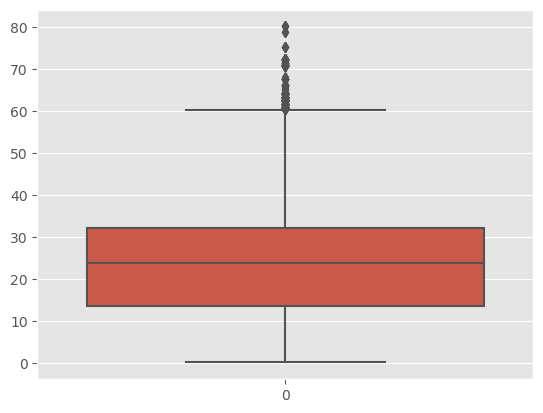

In [9]:
# boxplot for weight

sns.boxplot(train_df['weight'])


plt.show()

The boxplot for weight variable shows the minimum value of a crab to be as low as 0.05, with a median weight of 23.385, and a maximum recoreded weight of 80.102. 

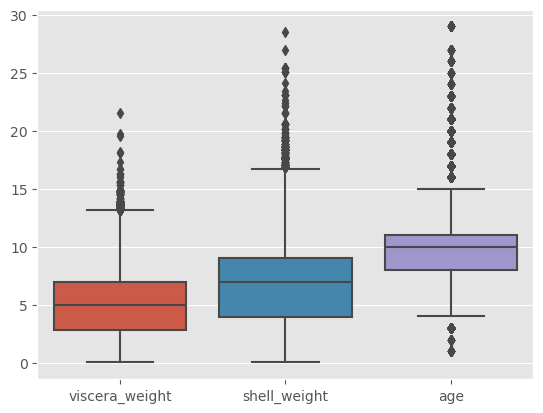

In [10]:
# boxplot


sns.boxplot(data = train_df.iloc[:, 6:])

plt.show()

Shucked Weight:
The median weight for `shucked_weight` variable is 10.104, with a minimum value of 0.02, and a maximum value of 42.184.

Viscera Weight:
The median weight for `viscera_weight` or the weight of the internal organs is 5.058, with a minimum value of 0.04, and a maximum value of 21.545.

Shell Weight:
The median weight for `shell_weight` is 6.724, with a minimum weight of 0.04, and a maximum weight value of 28.491.

Age:
The median age for this dataset is 9.97 years old, with the youngest being at 1 years old, and the oldest at 29 years old.

/Users/hongwei/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


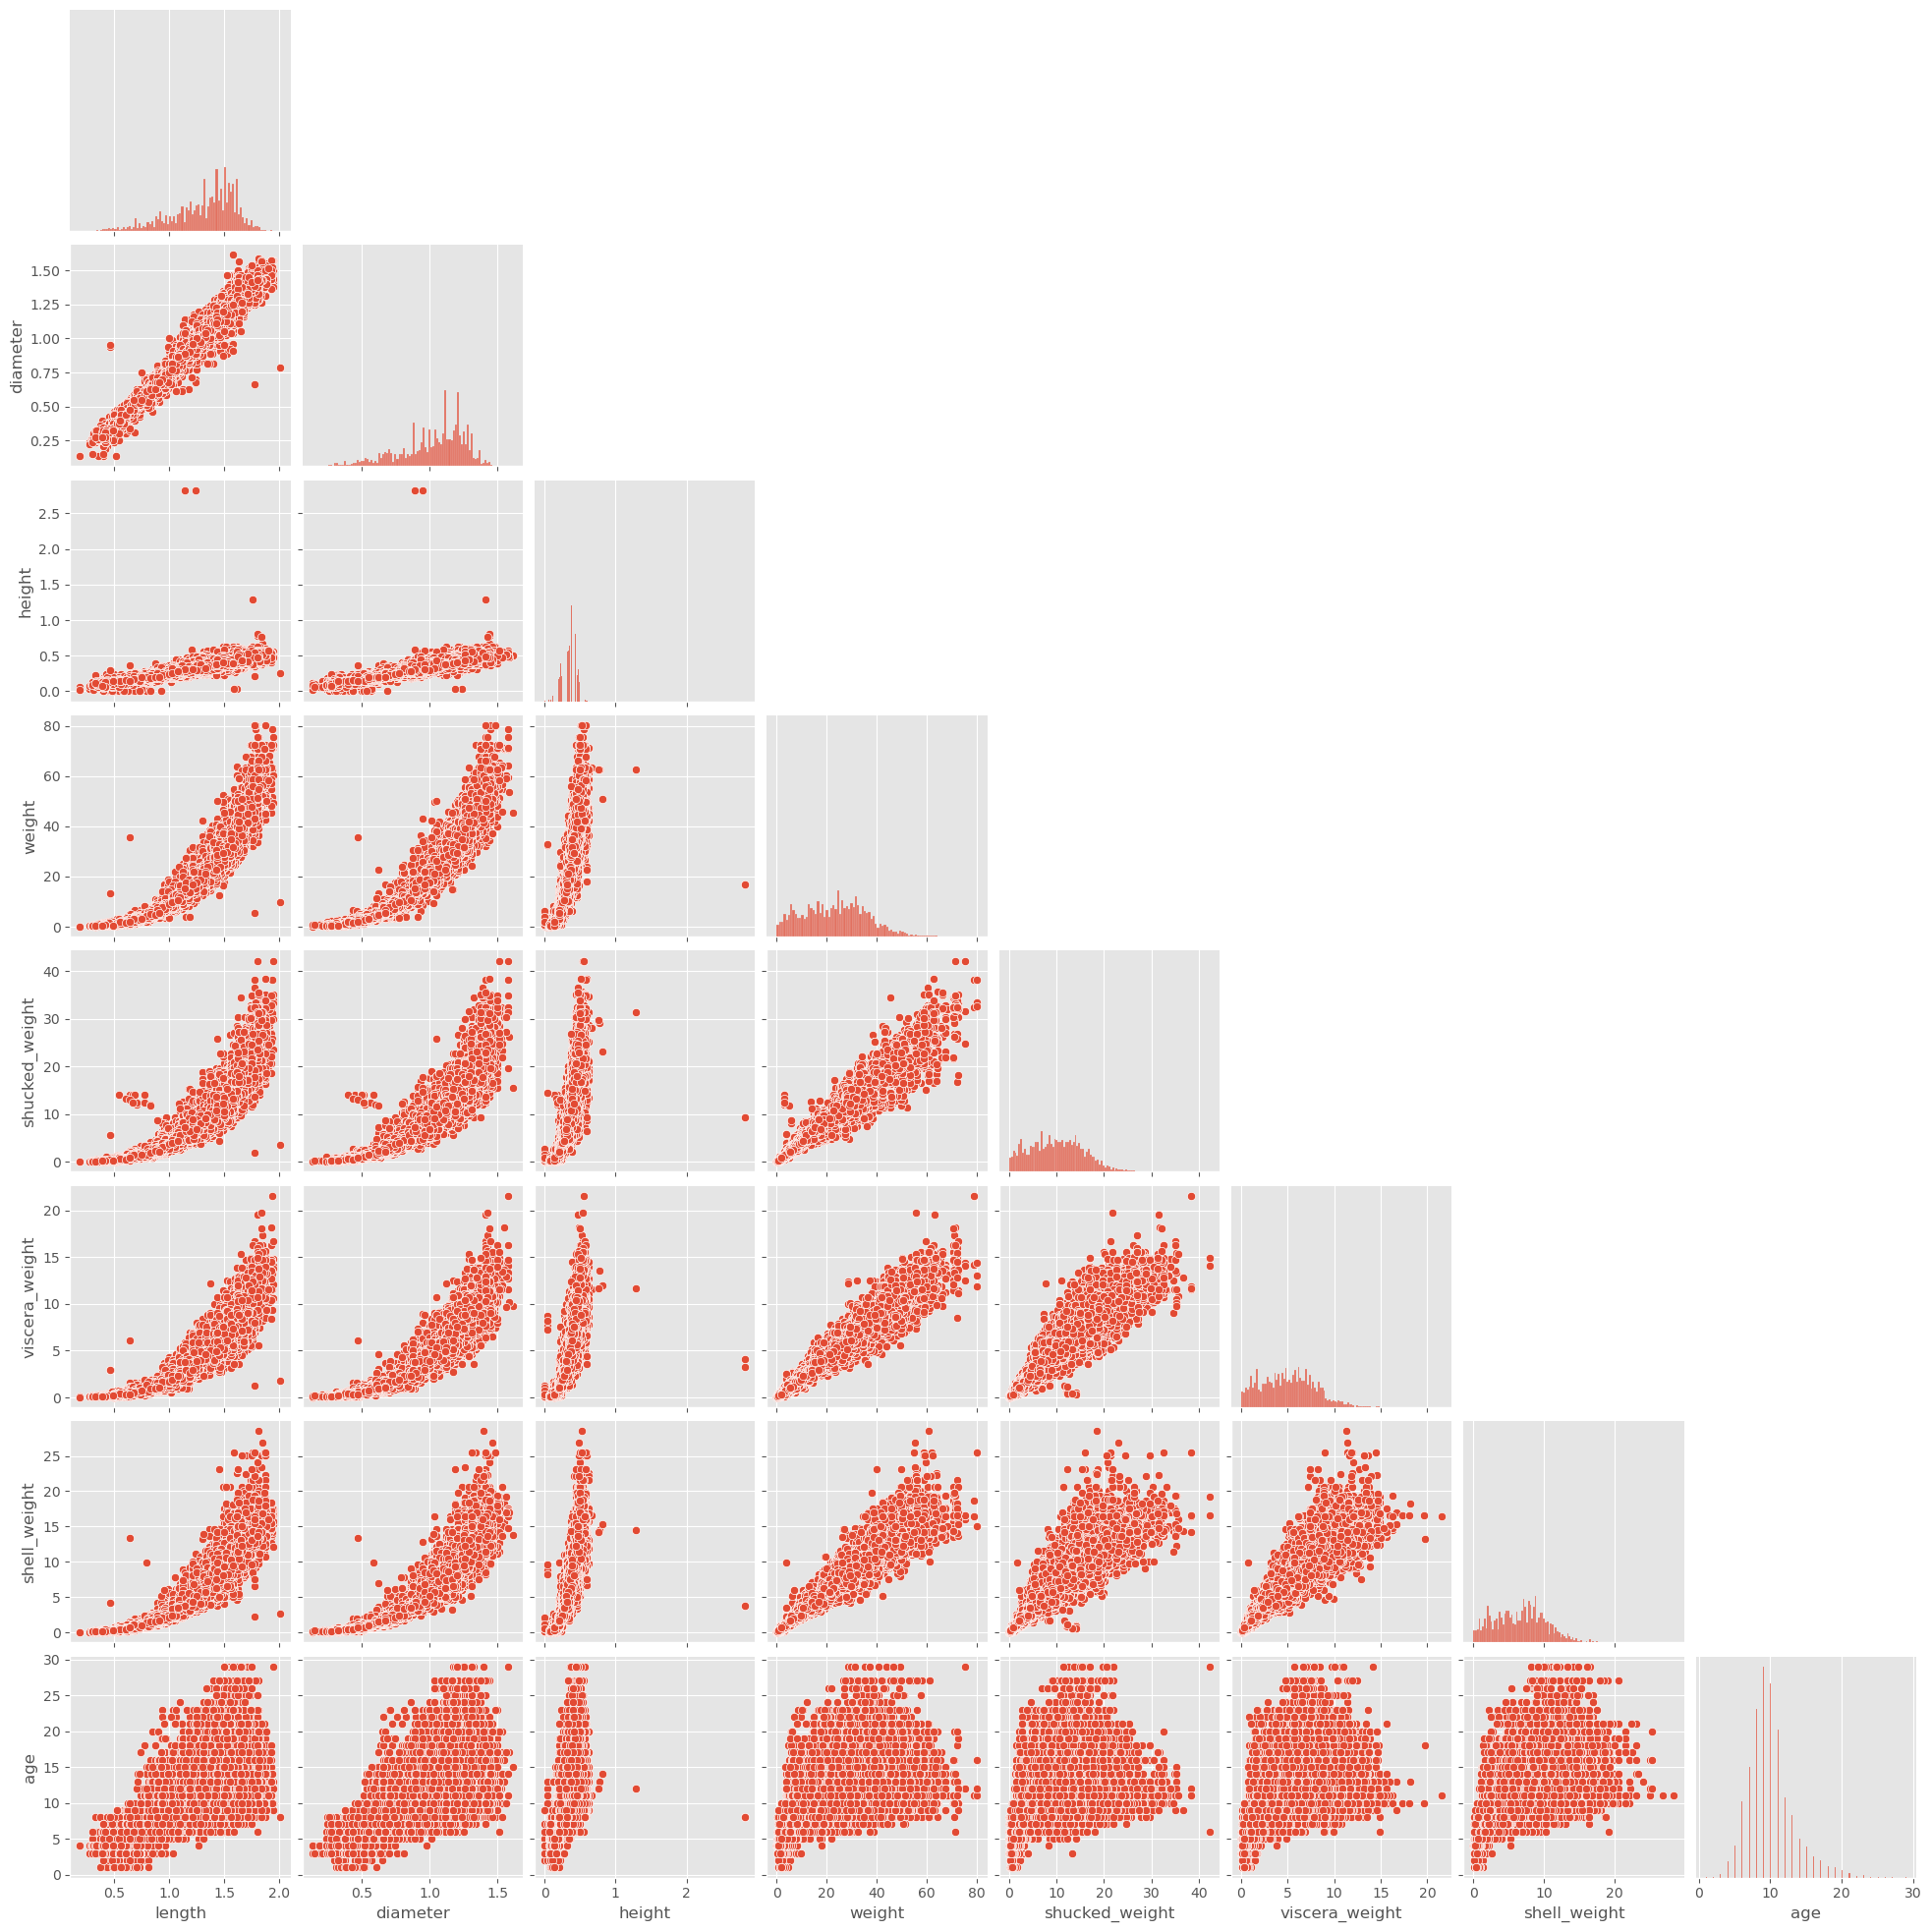

In [11]:
# Visualizing relationships

sns.pairplot(data=train_df, diag_kind='hist', corner=True)

plt.show()

Based on the paiplot, the independent variables are generally normally distributed with length and diameter being left-skewed, whereas the rest of the independent variables are right-skewed.

Looking at the relationships between independent variables, the following pairs are have a linearly relationship.
- diameter and length
- height and length 
- height and diameter

The following pairs have a polynomial relationship
- weight and length
- weight and diameter
- weight and height


The relationships between weight variables (weight, shucked_weight, viscera_weight, shell_weight) is somewhat linear but has a conical shape in the graph with higher variability at higher values. 


In [12]:
print(train_df.head())

  sex  length  diameter  height     weight  shucked_weight  viscera_weight  shell_weight  age
0   I  1.5250    1.1750  0.3750  28.973189       12.728926        6.647958      8.348928    9
1   I  1.1000    0.8250  0.2750  10.418441        4.521745        2.324659      3.401940    8
2   M  1.3875    1.1125  0.3750  24.777463       11.339800        5.556502      6.662133    9
3   F  1.7000    1.4125  0.5000  50.660556       20.354941       10.991839     14.996885   11
4   I  1.2500    1.0125  0.3375  23.289114       11.977664        4.507570      5.953395    8


<Axes: >

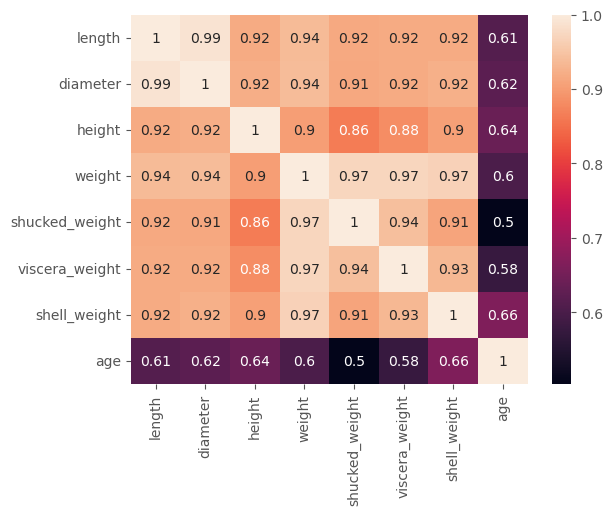

In [13]:
# Correlation Matrix

train_corr = train_df.corr(numeric_only=True)


sns.heatmap(train_corr, annot=True, fmt='.2g')


# Checking Height Feature

In [17]:
midget_crabs = train_df[train_df['height']==0]

midget_crabs.shape

(24, 9)

There are 24 crabs in this dataset where height = 0, let's assess if they are valid entries

In [18]:
midget_crabs

,sex,length,diameter,height,weight,shucked_weight,viscera_weight,shell_weight,age
762,I,0.787500,0.5750,0.0,3.727959,1.417475,0.807961,1.133980,4
3585,I,0.737087,0.5250,0.0,2.267960,0.737087,0.652038,0.708738,5
8749,I,0.525000,0.3750,0.0,2.863300,1.204854,0.425243,0.425243,4
9320,I,0.462500,0.3250,0.0,0.893009,0.354369,0.141747,0.269320,7
11542,I,0.637500,0.4375,0.0,1.771844,0.637864,0.396893,0.462525,3
13456,I,0.575000,0.4000,0.0,1.304077,0.467767,0.340194,0.382718,3
14406,I,0.737500,0.5375,0.0,3.515338,1.630096,0.737087,0.878834,2
15463,I,0.500000,0.4000,0.0,1.318252,0.411068,0.226796,0.283495,4
16301,I,0.437500,0.3625,0.0,1.077281,0.467767,0.184272,0.255146,4
28362,I,0.387500,0.2625,0.0,0.496116,0.141747,0.099223,0.141747,3


In [22]:
intersex_crabs = train_df[train_df['sex']=='I']
intersex_crabs.shape

(23957, 9)

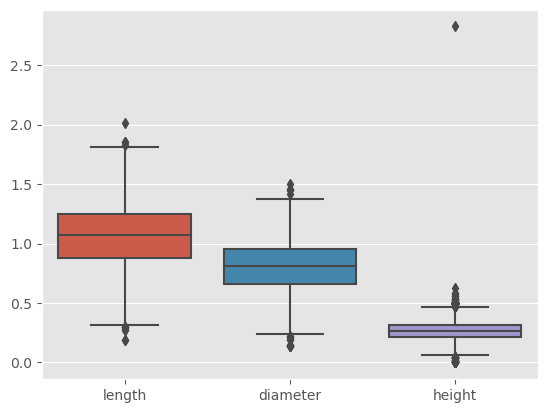

In [26]:
# boxplot

sns.boxplot(data = intersex_crabs.iloc[:, 0:4])

plt.show()

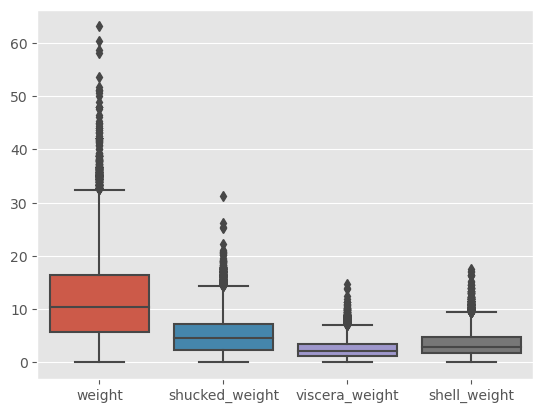

In [30]:
sns.boxplot(data = intersex_crabs.iloc[:, 4:8])

plt.show()

In [35]:
print(intersex_crabs.describe())

             length      diameter        height        weight  shucked_weight  viscera_weight  shell_weight           age
count  23957.000000  23957.000000  23957.000000  23957.000000    23957.000000    23957.000000  23957.000000  23957.000000
mean       1.046366      0.798842      0.263409     11.653656        5.136806        2.489438      3.417475      7.599073
std        0.262576      0.213477      0.077802      7.658189        3.464238        1.667061      2.222075      2.229675
min        0.187500      0.137500      0.000000      0.056699        0.028349        0.042524      0.042524      1.000000
25%        0.875000      0.662500      0.212500      5.684075        2.409708        1.176504      1.743494      6.000000
50%        1.075000      0.812500      0.262500     10.418441        4.635143        2.225436      2.976698      7.000000
75%        1.250000      0.950000      0.312500     16.414361        7.214948        3.543687      4.819415      8.000000
max        2.012815     

In [40]:
straight_crabs = train_df[(train_df['sex'] == 'M') | (train_df['sex'] == 'F')]
straight_crabs.describe()


,length,diameter,height,weight,shucked_weight,viscera_weight,shell_weight,age
count,50094.000000,50094.000000,50094.000000,50094.000000,50094.000000,50094.000000,50094.000000,50094.000000
mean,1.447108,1.132413,0.388587,28.995729,12.479914,6.286962,8.305123,11.100631
std,0.193589,0.159740,0.067505,10.542163,4.844860,2.352591,2.983633,2.925617
min,0.300000,0.250000,0.037500,0.411068,0.141747,0.085048,0.113398,3.000000
25%,1.337500,1.050000,0.350000,22.296882,9.086015,4.677668,6.378637,9.000000
50%,1.475000,1.162500,0.387500,29.058238,12.473780,6.251065,8.221355,10.000000
75%,1.575000,1.237500,0.437500,35.507749,15.464652,7.767763,10.064072,12.000000
max,1.950000,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


Intersex crabs are generally smaller compared to straight crabs, straight crabs are almost 3x heavier than intersex crabs. Shucked weight is almost 2.5x, which means that if you go to a seafood stall next time, you must say "no homo".

In [45]:
print(test_df[test_df['height']==0].shape)

(49368, 8)


In the test set, all entries measured height as 0. In the next notebook we will determine if height is an important feature or one that can be dropped.